In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
df=pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## 1. Test for multicolinearity

In [3]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## Correlation matrix

<AxesSubplot:>

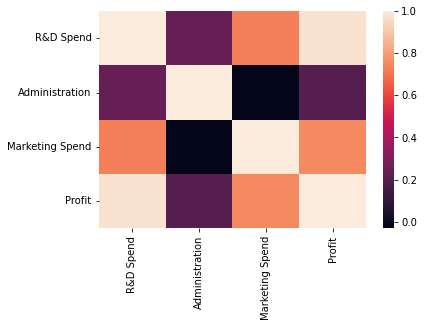

In [6]:
sns.heatmap(df.corr())

## Scatterplot between variables along with histograms

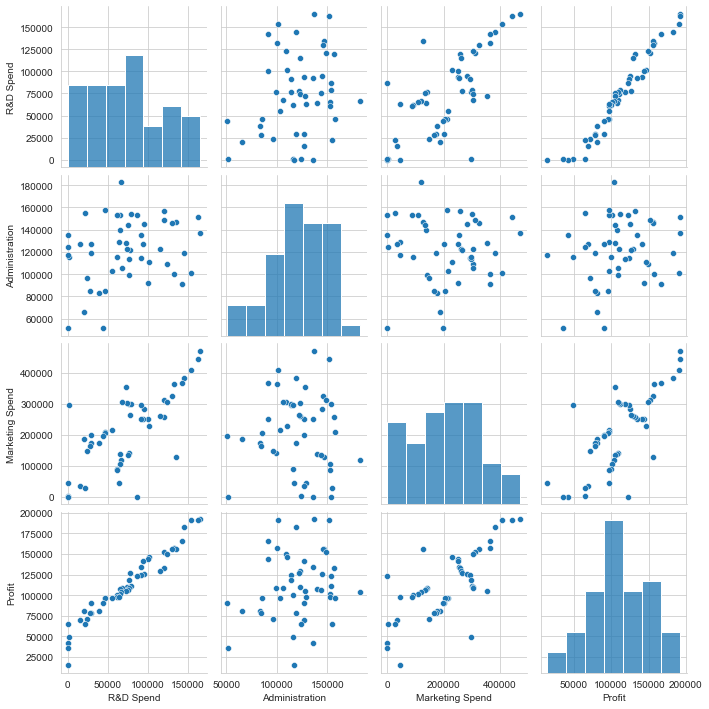

In [7]:
sns.set_style(style="whitegrid")
sns.pairplot(df)

## Preparing the model

In [8]:
df=df.rename(columns={"R&D Spend":"Spend","Marketing Spend":"Marketing_Spend"})

In [9]:
df.shape

(50, 5)

In [10]:
model=smf.ols("Profit~Spend+Administration+Marketing_Spend",data=df).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        19:45:19   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Spend               0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## VIF Values

In [12]:
rsq_hp=smf.ols('Spend~Administration+Marketing_Spend',data=df).fit().rsquared
vif_hp1=1/(1-rsq_hp)
print(vif_hp1)


2.4689030699947017


In [13]:
rsq_hp=smf.ols('Administration~Spend+Marketing_Spend',data=df).fit().rsquared
vif_hp2=1/(1-rsq_hp)
print(vif_hp2)

1.1750910070550458


In [14]:
rsq_hp=smf.ols('Marketing_Spend~Administration+Spend',data=df).fit().rsquared
vif_hp3=1/(1-rsq_hp)
print(vif_hp3)

2.3267732905308773


In [15]:
d1={"Features":["Spend","Administration","Marketing_Spend"],"VIF Values":[vif_hp1,vif_hp2,vif_hp3]}
VIF_Frame=pd.DataFrame(d1)
VIF_Frame

,Features,VIF Values
0,Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


In [16]:
# as our vif values are low we will not remove any feature.

# 2. Residual vs Regressor

In [17]:
error=model.resid
error.head()

0    -259.422890
1    2635.291768
2    8903.110904
3    9205.289974
4   -5951.574183
dtype: float64

In [18]:
# error should not be dependent on features.

In [19]:
y_pred=model.predict()
y_pred

array([192521.25289008, 189156.76823226, 182147.2790962 , 173696.70002553,
       172139.51418327, 163580.7805712 , 158114.09666865, 160021.36304781,
       151741.69969865, 154884.68410995, 135509.01636714, 135573.71296074,
       129138.05418243, 127487.99166275, 149548.64633453, 146235.1599852 ,
       116915.40540144, 130192.44720781, 129014.2268059 , 115635.21636716,
       116639.6692309 , 117319.45164029, 114706.98171695, 109996.61522126,
       113362.96611314, 102237.72506481, 110600.5753503 , 114408.07145684,
       101660.02600497, 101794.98345176,  99452.37293606,  97687.85627575,
        99001.32898549,  97915.00780465,  89039.27374116,  90511.59956753,
        75286.17458546,  89619.5377079 ,  69697.43064804,  83729.01197692,
        74815.95399105,  74802.55623866,  70620.41182056,  60167.03996335,
        64611.3549157 ,  47650.64968691,  56166.20685261,  46490.58898335,
        49171.38815763,  48215.1341113 ])

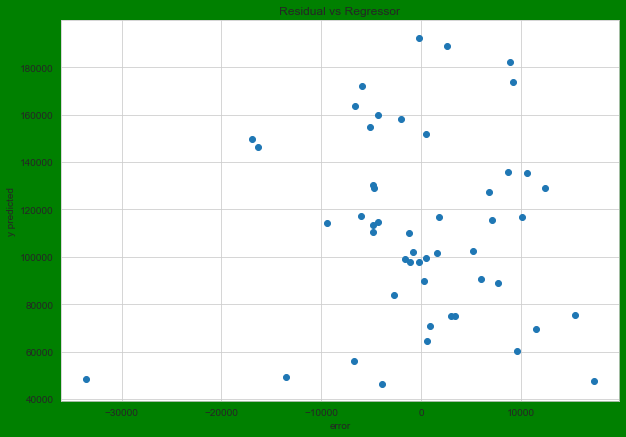

In [20]:
plt.figure(figsize=(10,7),facecolor="green")
plt.scatter(error,y_pred)
plt.xlabel("error")
plt.ylabel("y predicted")
plt.title("Residual vs Regressor")
plt.show()

# 3. Test for Normality

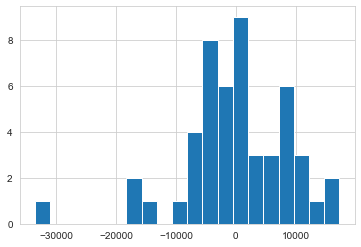

In [21]:
plt.hist(model.resid,bins=20)
plt.show()

In [22]:
# error is not normally distributed so will do the transformation

In [23]:
model1=smf.ols("np.log(Profit)~Spend+Administration+Marketing_Spend",data=df).fit()

In [24]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     49.02
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           2.28e-14
Time:                        19:45:30   Log-Likelihood:                 3.9014
No. Observations:                  50   AIC:                            0.1972
Df Residuals:                      46   BIC:                             7.845
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.8383      0.166     65.249      0.000      10.504      11.173
Spend            8.122e-06   1.14e-06      7.118      0.000    5.83e-06    1.04e-05
Administration   3.083e-07   1.29e-06      0.239      0.812   -2.29e-06     2.9e-06
Marketing_Spend  3.214e-07   4.16e-07      0.773      0.443   -5.15e-07    1.16e-06
==============================================================================
Omnibus:                       74.731   Durbin-Watson:                   0.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.557
Skew:                          -3.913   Prob(JB):                    4.26e-204
Kurtosis:                      22.705   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model2=smf.ols("Profit~Spend+np.log(Administration+Marketing_Spend)",data=df).fit()

In [26]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     454.0
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.83e-31
Time:                        19:45:31   Log-Likelihood:                -525.36
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1062.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 -4.87e+04   4.86e+04     -1.003      0.321   -1.46e+05     4.9e+04
Spend                                        0.7965      0.040     19.724      0.000       0.715       0.878
np.log(Administration + Marketing_Spend)  8077.8288   4008.073      2.015      0.050      14.626    1.61e+04
==============================================================================
Omnibus:                       14.652   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.029
Skew:                          -0.910   Prob(JB):                     1.65e-05
Kurtosis:                       5.694   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
model3=smf.ols('Profit~np.log(Spend+Administration+Marketing_Spend)',data=df).fit()

In [28]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     97.00
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           4.16e-13
Time:                        19:45:32   Log-Likelihood:                -573.02
No. Observations:                  50   AIC:                             1150.
Df Residuals:                      48   BIC:                             1154.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                         -7.24e+05   8.49e+04     -8.523      0.000   -8.95e+05   -5.53e+05
np.log(Spend + Administration + Marketing_Spend)  6.525e+04   6624.974      9.849      0.000    5.19e+04    7.86e+04
==============================================================================
Omnibus:                        1.815   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                0.973
Skew:                          -0.186   Prob(JB):                        0.615
Kurtosis:                       3.574   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model4=smf.ols("Profit~np.log(Spend+Administration)+Marketing_Spend",data=df).fit()

In [30]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     92.99
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           4.60e-17
Time:                        19:45:33   Log-Likelihood:                -560.64
No. Observations:                  50   AIC:                             1127.
Df Residuals:                      47   BIC:                             1133.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -6.964e+05   1.01e+05     -6.862      0.000   -9.01e+05   -4.92e+05
np.log(Spend + Administration)  6.406e+04   8582.280      7.464      0.000    4.68e+04    8.13e+04
Marketing_Spend                    0.1500      0.025      5.960      0.000       0.099       0.201
==============================================================================
Omnibus:                        1.502   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.472   Jarque-Bera (JB):                1.038
Skew:                          -0.352   Prob(JB):                        0.595
Kurtosis:                       3.062   Cond. No.                     9.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# model 2 is giving the best r2 and aic values 

## Deleting the outliers

### Cooks Distance

In [32]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [33]:
K=3
N=50
3*(K+1)/N

0.24

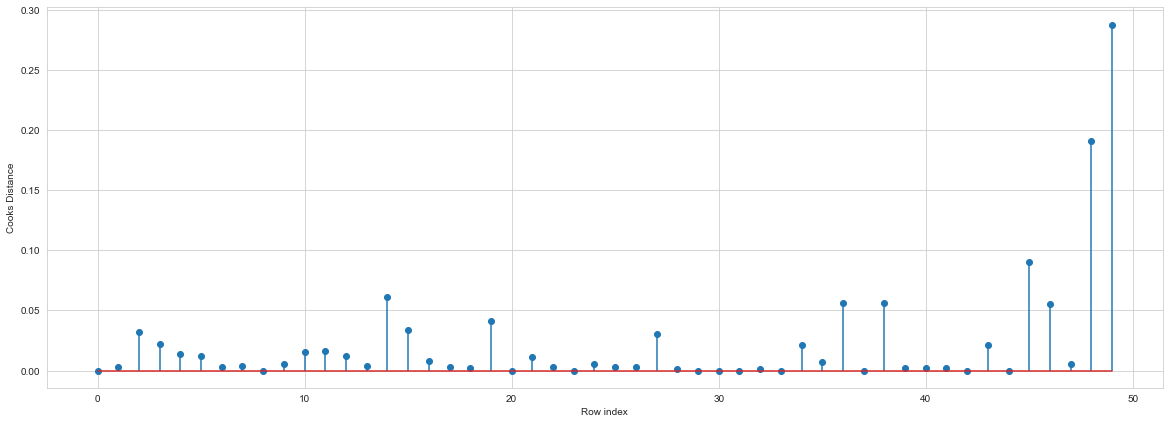

In [34]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [36]:
np.where(c>0.24)

(array([49], dtype=int64),)

In [37]:
df=df.drop(df.index[[49]],axis=0).reset_index()

## Final Model

In [38]:
f1_model= smf.ols('Profit~Spend+np.log(Administration+Marketing_Spend)',data=df).fit()

In [39]:
f1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     572.1
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           3.19e-33
Time:                        19:45:55   Log-Likelihood:                -506.26
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1024.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                -3.742e+04   4.08e+04     -0.916      0.364    -1.2e+05    4.48e+04
Spend                                        0.7757      0.034     22.675      0.000       0.707       0.845
np.log(Administration + Marketing_Spend)  7363.4764   3368.896      2.186      0.034     582.241    1.41e+04
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.198
Skew:                           0.058   Prob(JB):                        0.906
Kurtosis:                       2.712   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# for model 2 will plot the histogram

In [41]:
error1=f1_model.resid

In [42]:
error1

0      3347.866504
1      5176.444416
2     12689.097765
3     11680.682394
4     -2595.687623
5     -3938.547777
6     -3098.328993
7     -4058.750282
8       111.666322
9     -3719.027369
10    10709.309937
11     9771.027230
12    11647.736742
13     5609.505690
14   -18234.719435
15   -16186.639620
16     9181.088517
17    -6108.018467
18    -4629.077149
19     5232.340800
20     1536.283357
21    -7978.699131
22    -5071.262957
23    -1402.551487
24    -5005.611464
25     2375.530647
26    -7585.304954
27    -9844.582207
28    -3415.295036
29    -4278.687042
30     -853.135183
31    -3767.010412
32    -3244.374353
33    -2131.641586
34     3744.005710
35     5579.836767
36    12370.791014
37     1714.588642
38    11402.150287
39    -3234.802924
40      709.058144
41     2087.205441
42     -765.856058
43     6785.259732
44    -3810.579711
45    15093.148361
46    -9323.809749
47    -7025.263485
48    -7247.359962
dtype: float64

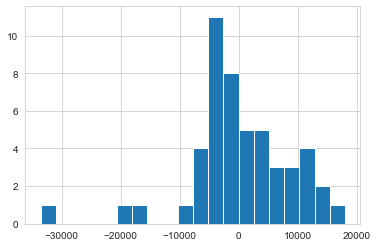

In [43]:
plt.hist(model2.resid,bins=20)
plt.show()